題目名稱:美食選擇器  

題目說明:輸入想法就能為你找到餐廳，沒想法也能為你做出選擇

### 範例
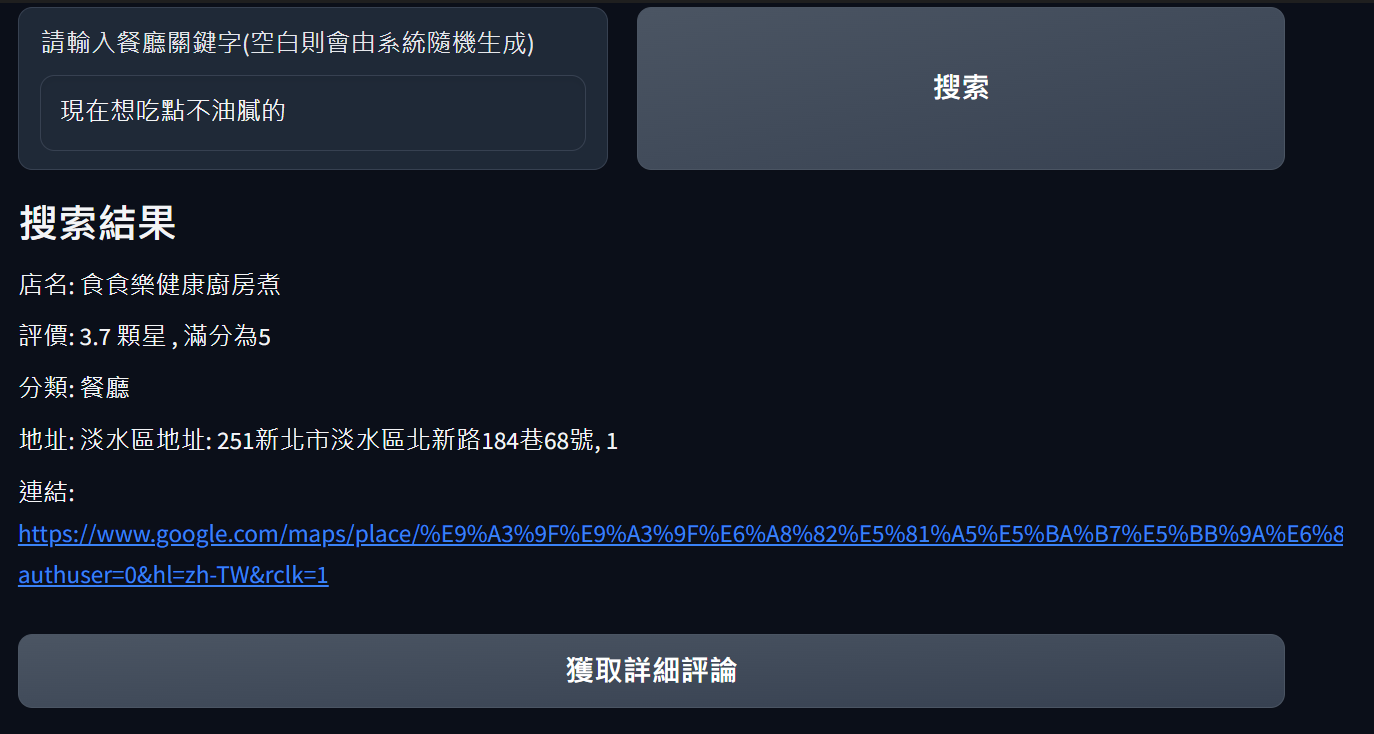
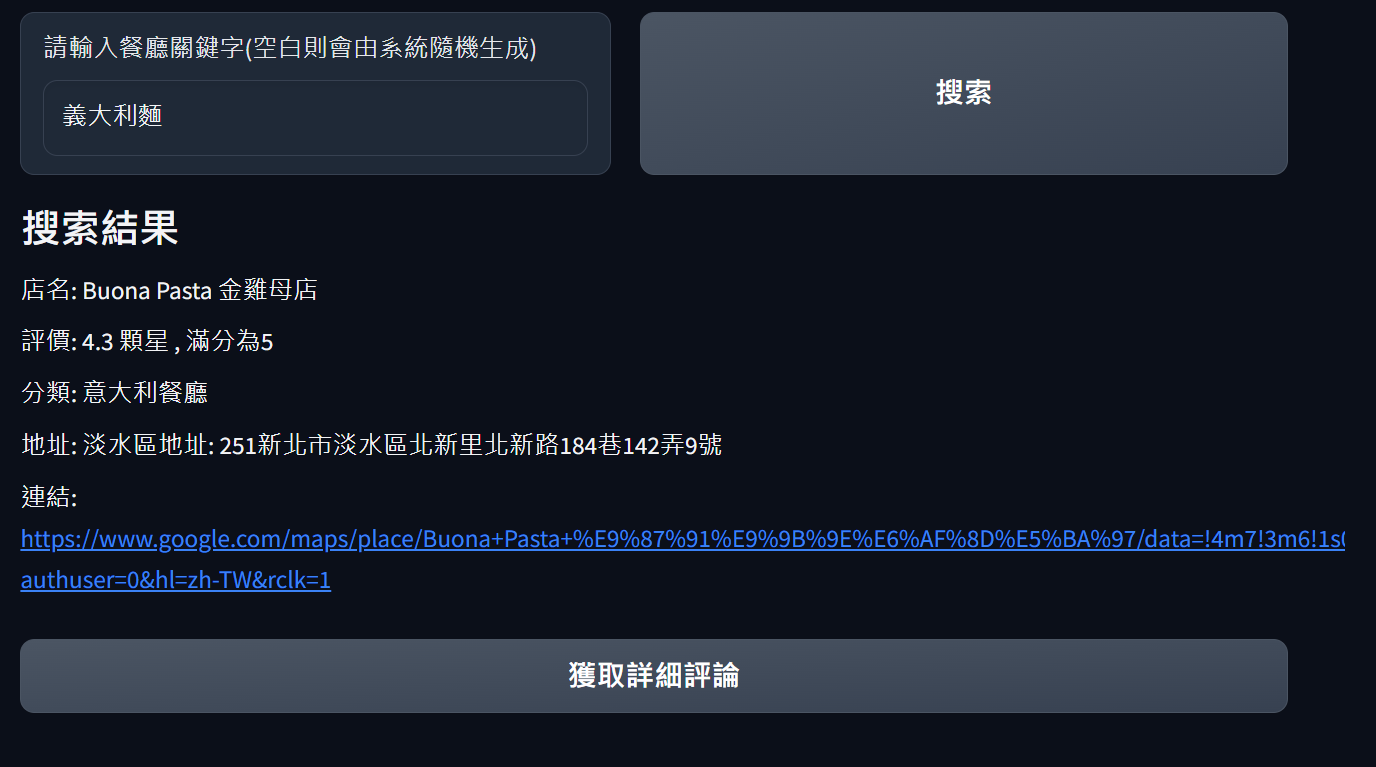
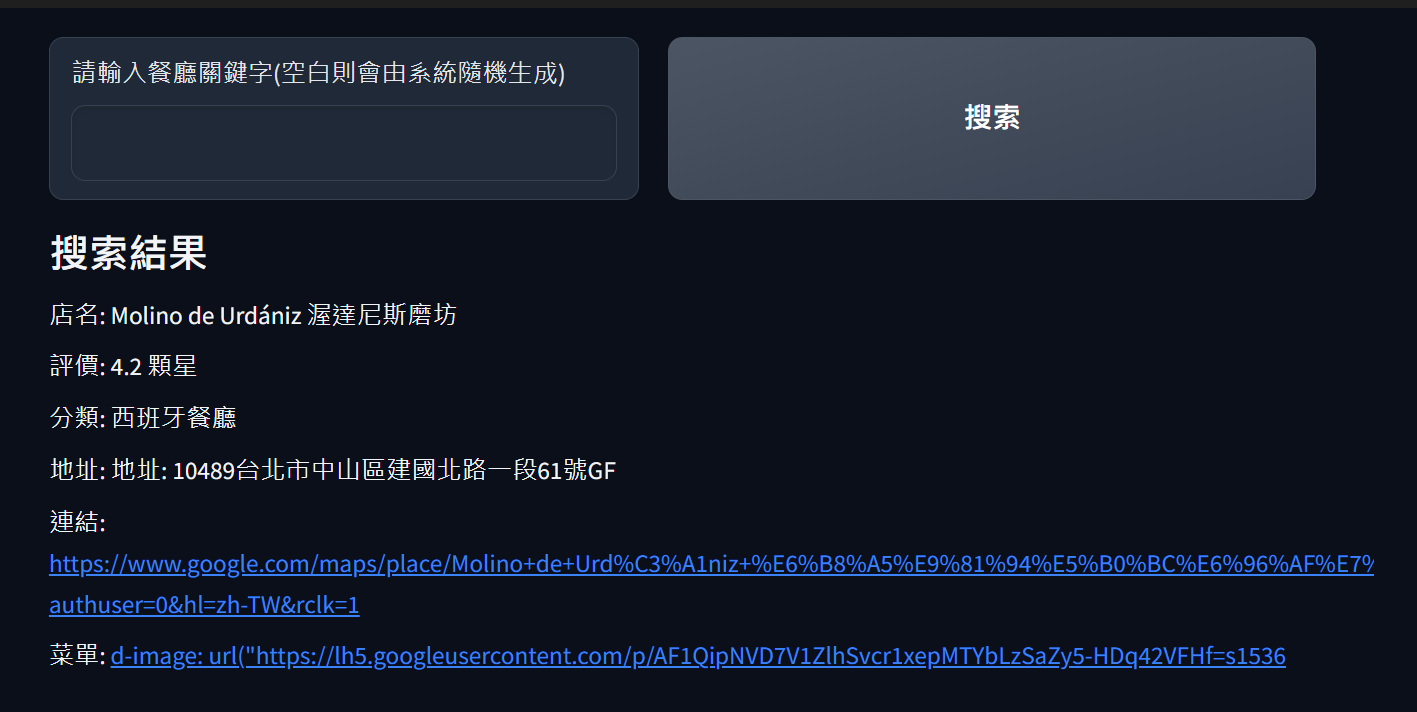
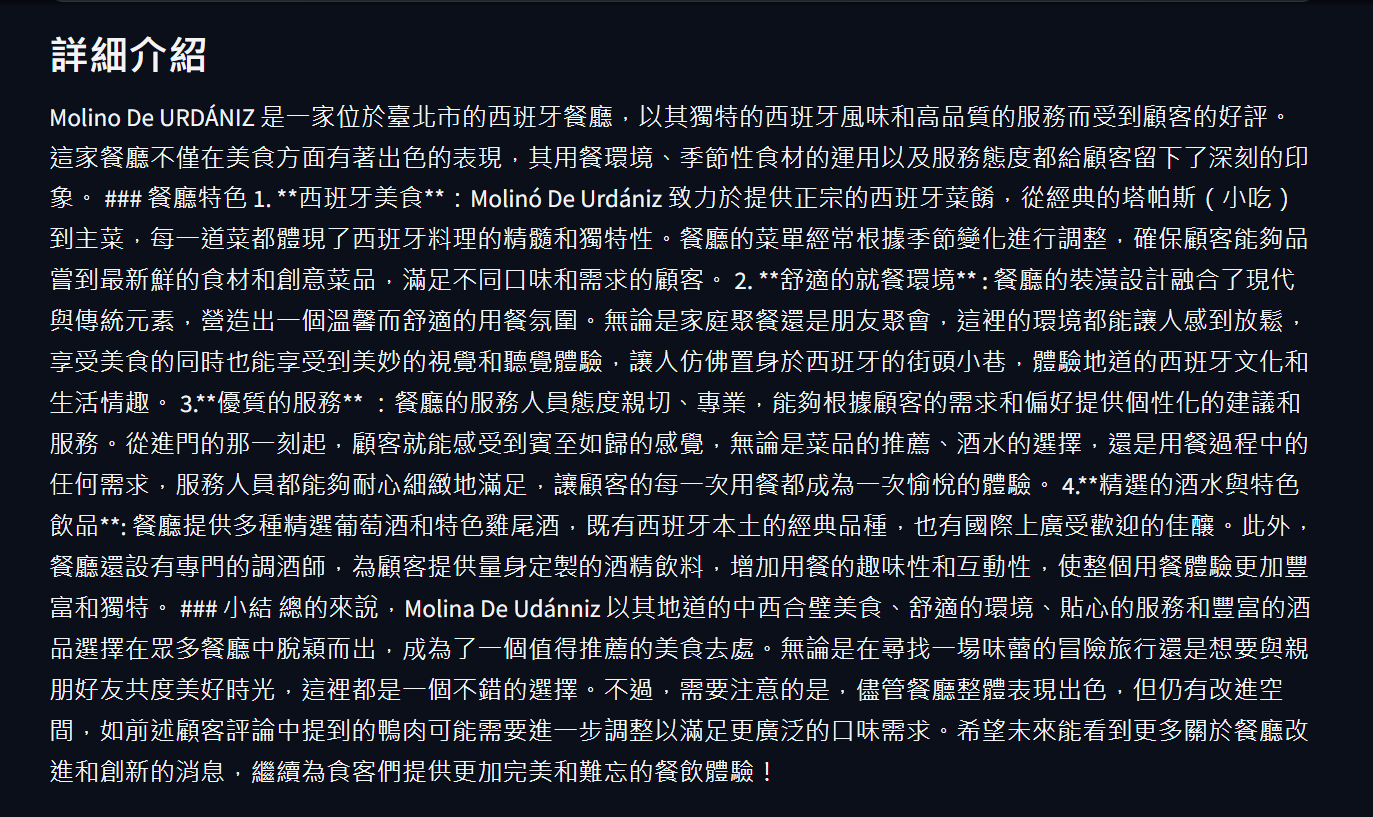
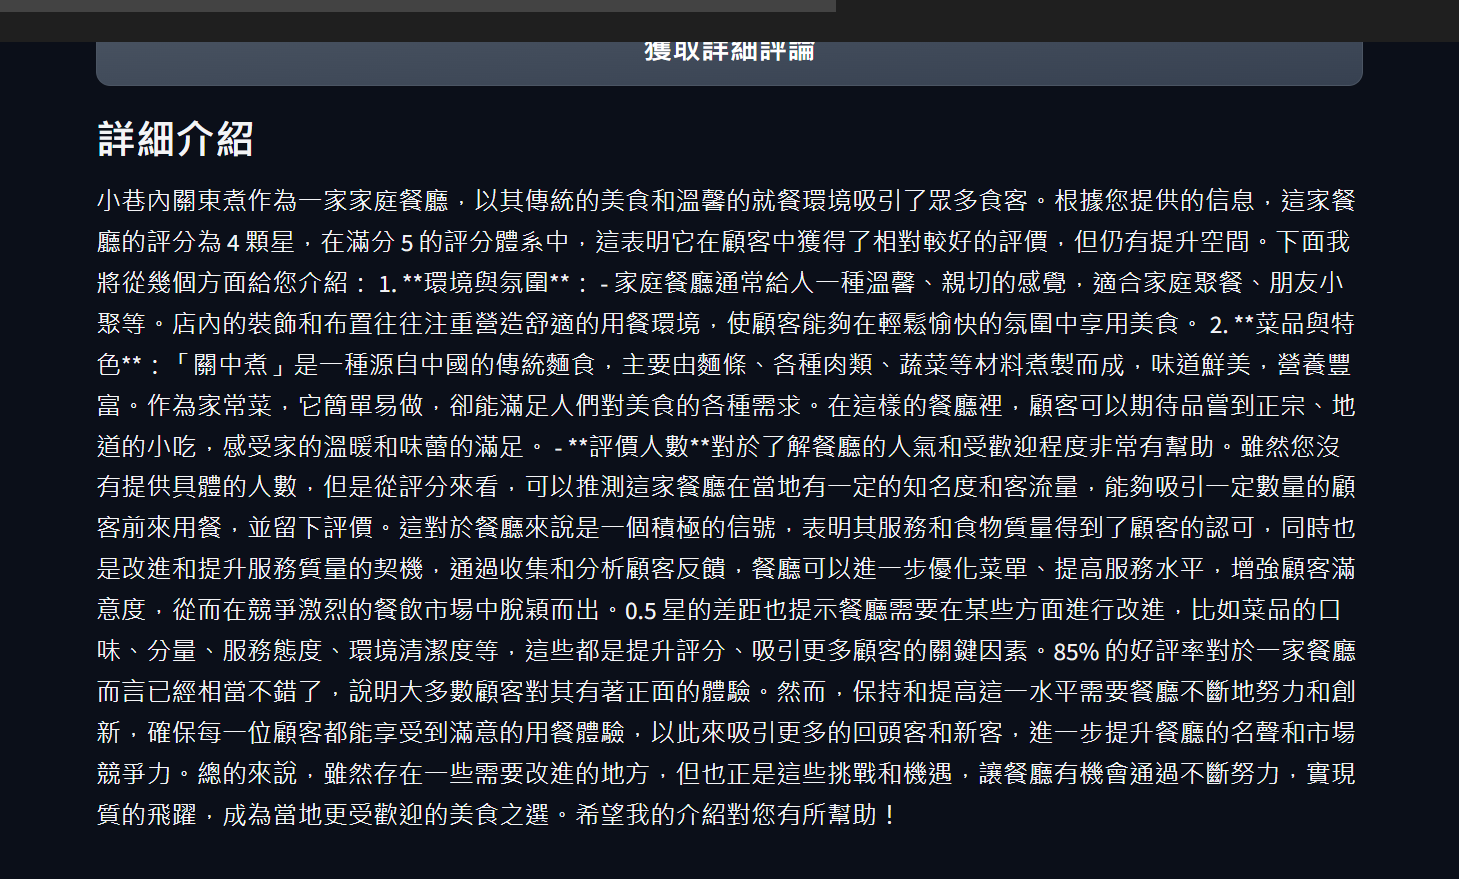

### 實用性

可以幫助選擇困難的人做出選擇，也能夠整合各大餐廳來做為資料庫來促進發展

### 知識性

使用了:LLM、Quantization、finetune、gradio、selenium、BeautifulSoup、sqlalchemy

### 新穎性

自行創作，靈感來自常常與同學們討論要吃什麼

In [1]:
import gradio as gr  # 導入 Gradio 庫來創建網頁界面
from db.db import DB  # 從 db 模塊導入 DB 類，用於數據庫操作
import random  # 導入 random 庫以支持隨機功能
from LLMresponse import generate_response  # 導入自定義模塊來生成回應
from googlemap_crawler import GoogleMapCrawler  # 導入 Google 地圖爬蟲類

# 實例化 GoogleMapCrawler 和 DB
chromeDriver = 'chromedriver-linux64/chromedriver'
map = GoogleMapCrawler(chromeDriver)
db = DB()

# 定義初步搜索功能
def initial_search(prompt):
    db = DB()  # 重新實例化數據庫連接
    if prompt == "":  # 如果輸入為空白底線，表示隨機選取關鍵字
        keywords_list = db.getKeywords()  # 從數據庫獲取所有關鍵字
        if len(keywords_list) == 0:  # 如果沒有關鍵字，返回錯誤信息
            return "你沒有輸入過任何文字!"
        keyword = random.choice(keywords_list)  # 隨機選取一個關鍵字
    else:
        keyword = prompt  # 使用用戶輸入的關鍵字

        system_prompt="依照以下提示詞給予餐廳的一個關鍵字就好"
        keyword = generate_response(system_prompt, f"User:{prompt}")  # 生成基於使用者想法的關鍵字

    # 使用爬蟲搜索餐廳基本信息
    try:
        result = map.search(keyword)
        if prompt != "":
            if len(db.checkKeyword(keyword=keyword)) == 0:  # 檢查關鍵字是否新
                db.storeKeyword(keyword)  # 儲存新的關鍵字
        base_response = f'''
        <h2>搜索結果</h2>
        <p>店名: {result[0]}</p>
        <p>評價: {result[1]}</p>
        <p>分類: {result[2]}</p>
        <p>地址: {result[3]}</p>
        <p>連結: <a href="{result[4]}" target="_blank">{result[4]}</a></p>
        <p>菜單: <a href="{result[6]}" target="_blank">{result[6]}</a></p>
        '''  # 構建 HTML 格式的搜索結果
        data = f'''
        店名:{result[0]}
        評價:{result[1]},滿分為5
        分類:{result[2]}
        地址:淡水區{result[3]}
        評論:{result[5]}
        '''  # 構建用於傳遞的數據字符串
        
    except:
        base_response = keyword
        data = keyword
    return base_response, data,""

# 定義生成詳細回應的功能
def generate_detailed_response(prompt):
    system_prompt = "給予介紹"
    enhanced_review = generate_response(system_prompt, f"User:{prompt}")  # 生成更詳細的回應
    enhanced_response = f'''
    <h2>詳細介紹</h2>
    <p>{enhanced_review}</p>
    '''  # 構建 HTML 格式的詳細介紹
    return enhanced_response

# 使用 Gradio 構建網頁界面
with gr.Blocks() as block:
    with gr.Row():
        prompt_input = gr.Textbox(label="請輸入餐廳關鍵字(空白則會由系統隨機生成)")
        submit_button = gr.Button("搜索")
    output = gr.HTML()
    data = gr.Textbox(visible=False)  # 隱藏的文本框用於存儲和傳遞變量

    submit_button.click(
        initial_search, 
        inputs=prompt_input,
        outputs=[output, data,prompt_input]
    )
    detailed_button = gr.Button("獲取詳細評論")
    detailed_output = gr.HTML()

    detailed_button.click(
        generate_detailed_response, 
        inputs=data,
        outputs=detailed_output
    )

block.launch(server_name="163.13.136.86", server_port=1233, share=True)  # 啟動伺服器並共享

/home/e806/anaconda3/envs/dcbot2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 4/4 [00:04<00:00,  1.22s/it]


2024-04-20 11:32:14,327 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-04-20 11:32:14,328 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("user_pref")
2024-04-20 11:32:14,328 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-04-20 11:32:14,329 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("search_record")
2024-04-20 11:32:14,329 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-04-20 11:32:14,330 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("keywords")
2024-04-20 11:32:14,330 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-04-20 11:32:14,330 INFO sqlalchemy.engine.Engine COMMIT
Running on local URL:  http://163.13.136.86:1233
Running on public URL: https://4a8ca5430ce3208b12.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


2024-04-20 11:32:56,763 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-04-20 11:32:56,764 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("user_pref")
2024-04-20 11:32:56,764 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-04-20 11:32:56,765 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("search_record")
2024-04-20 11:32:56,765 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-04-20 11:32:56,766 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("keywords")
2024-04-20 11:32:56,767 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-04-20 11:32:56,767 INFO sqlalchemy.engine.Engine COMMIT
2024-04-20 11:33:03,850 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-04-20 11:33:03,860 INFO sqlalchemy.engine.Engine SELECT keywords.id, keywords.keyword, keywords.add_date 
FROM keywords 
WHERE keywords.keyword = ?
2024-04-20 11:33:03,862 INFO sqlalchemy.engine.Engine [generated in 0.00218s] ('清涼',)
2024-04-20 11:33:03,865 INFO sqlalchemy.engine.Engine ROLLBACK
2024-04-20 11:33:03,8